In [2]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")



In [3]:
#styling for all graphs
bg_color = (0.25, 0.25, 0.25)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":False,
            'axes.labelsize':25,
            'figure.figsize':(10.0,5.0),
            'xtick.labelsize':15,
            'ytick.labelsize':10})   

In [4]:
#reading the dataset
df=pd.read_csv("heart.csv")
df2=pd.read_csv("heart.csv")

In [5]:
#displays first 5 entries
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
#renaming the columns
df.columns = ['Age', 'Gender', 'ChestPain', 'RestingBloodPressure', 'Cholestrol', 'FastingBloodSugar', 'RestingECG', 'MaxHeartRateAchieved',
       'ExerciseIndusedAngina', 'Oldpeak', 'Slope', 'MajorVessels', 'Thalassemia', 'Target']


In [7]:
#first five columns
df.head(20)

,Age,Gender,ChestPain,RestingBloodPressure,Cholestrol,FastingBloodSugar,RestingECG,MaxHeartRateAchieved,ExerciseIndusedAngina,Oldpeak,Slope,MajorVessels,Thalassemia,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [8]:
#last five columns
df.tail()

,Age,Gender,ChestPain,RestingBloodPressure,Cholestrol,FastingBloodSugar,RestingECG,MaxHeartRateAchieved,ExerciseIndusedAngina,Oldpeak,Slope,MajorVessels,Thalassemia,Target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [9]:
#size of the dataset
df.shape

(1025, 14)

In [10]:
#checking if nulls exist
df.isnull().sum() 

Age                      0
Gender                   0
ChestPain                0
RestingBloodPressure     0
Cholestrol               0
FastingBloodSugar        0
RestingECG               0
MaxHeartRateAchieved     0
ExerciseIndusedAngina    0
Oldpeak                  0
Slope                    0
MajorVessels             0
Thalassemia              0
Target                   0
dtype: int64

In [11]:
#unique values
df.nunique()

Age                       41
Gender                     2
ChestPain                  4
RestingBloodPressure      49
Cholestrol               152
FastingBloodSugar          2
RestingECG                 3
MaxHeartRateAchieved      91
ExerciseIndusedAngina      2
Oldpeak                   40
Slope                      3
MajorVessels               5
Thalassemia                4
Target                     2
dtype: int64

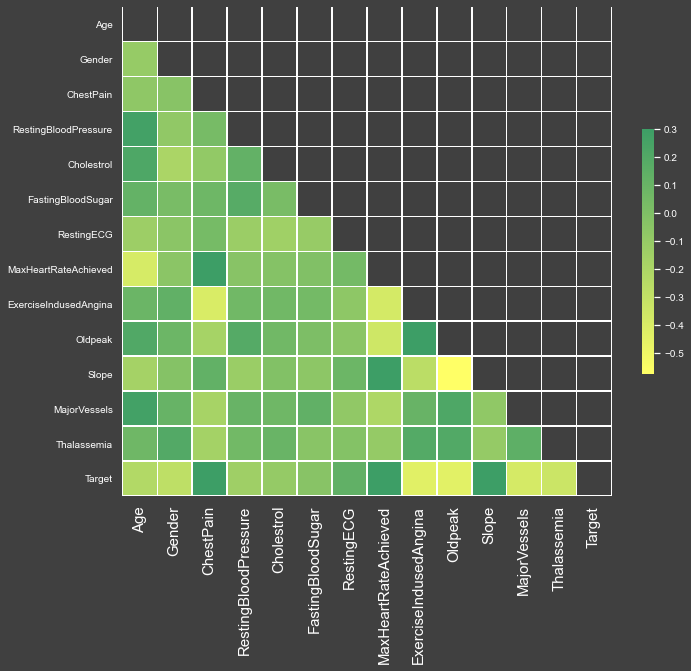

In [12]:
#correlation map
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,mask=mask,cmap='summer_r',vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

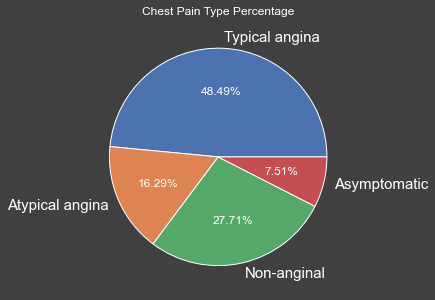

In [13]:
typical_angina_cp = [k for k in df['ChestPain'] if k ==0]
atypical_angina_cp = [k for k in df['ChestPain'] if k ==1]
non_anginal_cp = [k for k in df['ChestPain'] if k ==2]
none_cp = [k for k in df['ChestPain'] if k ==3]

typical_angina_cp_total = len(typical_angina_cp)*100/len(df)
atypical_angina_cp_total = len(atypical_angina_cp)*100/len(df)
non_anginal_cp_total = len(non_anginal_cp)*100/len(df)
none_cp_total = len(none_cp)*100/len(df)

labels=['Typical angina','Atypical angina','Non-anginal','Asymptomatic']
values = [typical_angina_cp_total,atypical_angina_cp_total,non_anginal_cp_total,none_cp_total]

plt.pie(values,labels=labels,autopct='%1.2f%%')

plt.title("Chest Pain Type Percentage")    
plt.show()

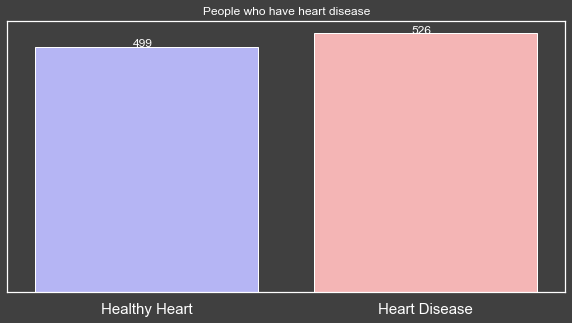

In [14]:
target=[];
for k in df['Target']:
    if k > 0:
        target.append(1)
    else:
        target.append(0)

ax = sns.countplot(x=target,palette='bwr')
plt.title("People who have heart disease")
plt.ylabel("")
plt.yticks([])
plt.xlabel("")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.5))
    ax.set_xticklabels(["Healthy Heart","Heart Disease"]);


plt.savefig("Heart-Health Vs Chest Pain Type.png",bbox_inches='tight',transparent=True)

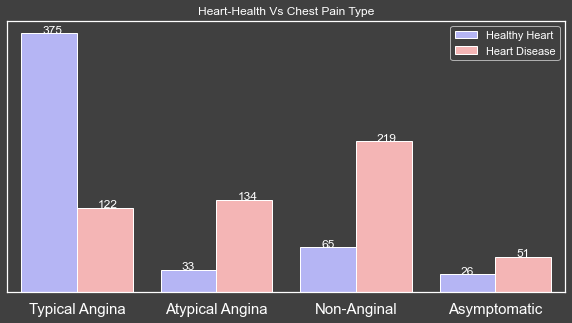

In [15]:
heart_health=[]
for k in df['Target']:
    if k == 0:
        heart_health.append('Healthy Heart')
    elif k == 1:
        heart_health.append('Heart Disease')
plt.title("Heart-Health Vs Chest Pain Type")
ax = sns.countplot(x='ChestPain',hue=heart_health,data=df,palette='bwr') 
plt.ylabel("")
plt.yticks([])
plt.xlabel("")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+0.5))
    ax.set_xticklabels(['Typical Angina','Atypical Angina','Non-Anginal','Asymptomatic']);

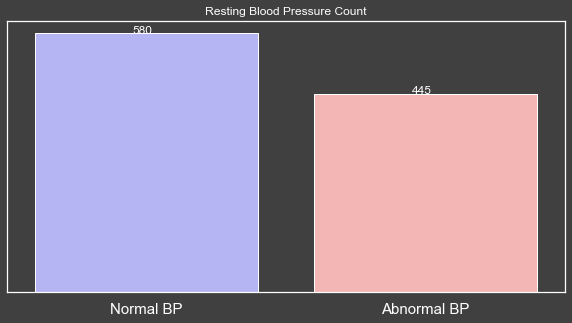

In [16]:
bp=[]
for k in df['RestingBloodPressure']:
    if (k > 130):
        bp.append(1) 
    else:
        bp.append(0) 

ax = sns.countplot(x=bp,palette='bwr')

plt.title("Resting Blood Pressure Count")
plt.ylabel("")
plt.yticks([])
plt.xlabel("")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.5))
    
ax.set_xticklabels(["Normal BP","Abnormal BP"]);

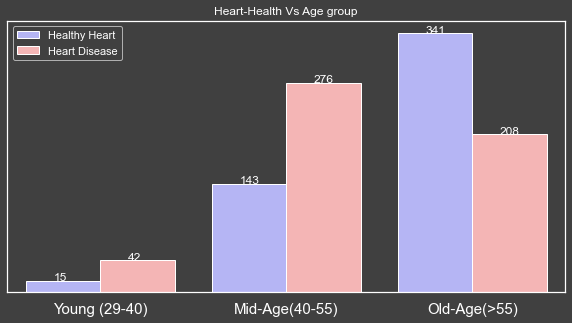

In [17]:
heart_health=[]
for k in df['Target']:
    if k == 0:
        heart_health.append('Healthy Heart')
    elif k == 1:
        heart_health.append('Heart Disease')
            
age_group=[]
for k in df['Age']:
    if (k >=29) & (k<40):
        age_group.append(0)
    elif (k >=40)&(k<55):
        age_group.append(1)
    else:
        age_group.append(2)
df['Age-Group'] = age_group
plt.title("Heart-Health Vs Age group")
ax = sns.countplot(x=age_group,hue=heart_health,palette='bwr')

plt.ylabel("")
plt.yticks([])
plt.xlabel("")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+0.5))
    
ax.set_xticklabels(['Young (29-40)','Mid-Age(40-55)','Old-Age(>55)']);

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X_data = df.drop(columns=['Age','Target'], axis=1)
Y = df['Target']

Y = ((Y - np.min(Y))/ (np.max(Y) - np.min(Y))).values
X = ((X_data - np.min(X_data)) / (np.max(X_data) - np.min(X_data))).values

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)


Logistic Regression Accuracy: 81.95%
Logistic Regression Recall: 88.35%
Logistic Regression Precision: 78.45%


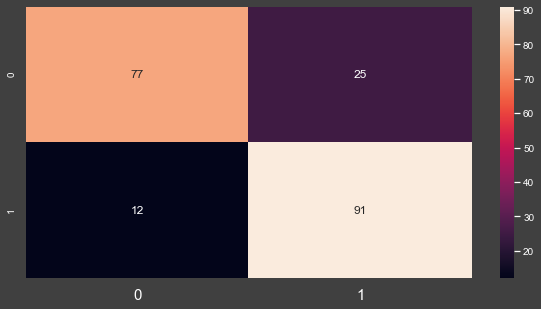

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)


lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

print('Logistic Regression Accuracy: {:.2f}%'.format(lr_accuracy*100))
print('Logistic Regression Recall: {:.2f}%'.format(lr_recall*100))
print('Logistic Regression Precision: {:.2f}%'.format(lr_precision*100))

cm = confusion_matrix(y_test,lr_pred)
sns.heatmap(cm,annot=True);

Random Forest Classifier Accuracy: 93.66%
Random Forest Classifier Recall: 96.12%
Random Forest Classifier Precision: 91.67%


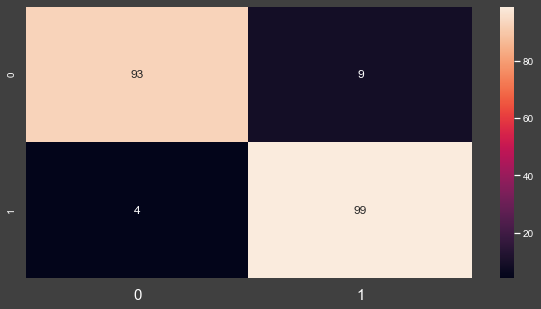

In [20]:
rfc = RandomForestClassifier(n_estimators = 50, max_depth = 7)

rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
rfc_accuracy = accuracy_score(y_test, rfc_pred)
rfc_recall = recall_score(y_test, rfc_pred)
rfc_precision = precision_score(y_test, rfc_pred)

print('Random Forest Classifier Accuracy: {:.2f}%'.format(rfc_accuracy*100))
print('Random Forest Classifier Recall: {:.2f}%'.format(rfc_recall*100))
print('Random Forest Classifier Precision: {:.2f}%'.format(rfc_precision*100))
cm = confusion_matrix(y_test,rfc_pred)
sns.heatmap(cm,annot=True);

In [21]:
X = df2.drop(['target'], axis = 1)
y = df2.target.values


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)


In [24]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense #check drop out for remove overfitting,remove flatten used for CNN
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")


Using TensorFlow backend.


In [27]:
import warnings
warnings.filterwarnings("ignore")
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 11, init = 'uniform', activation = 'relu', input_dim = 13))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 11, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
#run for 5,10,15 and epoch 100 ,150,check the accuracy differences to identify if accuracy is higher.
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)


Epoch 1/100
820/820 [==============================] - 0s 302us/step - loss: 0.6809 - accuracy: 0.7171
Epoch 2/100
820/820 [==============================] - 0s 152us/step - loss: 0.5324 - accuracy: 0.8415
Epoch 3/100
820/820 [==============================] - 0s 142us/step - loss: 0.3929 - accuracy: 0.8512
Epoch 4/100
820/820 [==============================] - 0s 157us/step - loss: 0.3606 - accuracy: 0.8500
Epoch 5/100
820/820 [==============================] - 0s 148us/step - loss: 0.3521 - accuracy: 0.8610
Epoch 6/100
820/820 [==============================] - 0s 189us/step - loss: 0.3449 - accuracy: 0.8598
Epoch 7/100
820/820 [==============================] - 0s 132us/step - loss: 0.3386 - accuracy: 0.8671
Epoch 8/100
820/820 [==============================] - 0s 159us/step - loss: 0.3344 - accuracy: 0.8744
Epoch 9/100
820/820 [==============================] - 0s 131us/step - loss: 0.3305 - accuracy: 0.8768
Epoch 10/100
820/820 [==============================] - 0s 116us/step - l

820/820 [==============================] - 0s 116us/step - loss: 0.1016 - accuracy: 0.9585
Epoch 80/100
820/820 [==============================] - 0s 109us/step - loss: 0.1008 - accuracy: 0.9598
Epoch 81/100
820/820 [==============================] - 0s 119us/step - loss: 0.1006 - accuracy: 0.9573
Epoch 82/100
820/820 [==============================] - 0s 115us/step - loss: 0.0982 - accuracy: 0.9573
Epoch 83/100
820/820 [==============================] - 0s 118us/step - loss: 0.0950 - accuracy: 0.9610
Epoch 84/100
820/820 [==============================] - 0s 146us/step - loss: 0.0946 - accuracy: 0.9659
Epoch 85/100
820/820 [==============================] - 0s 137us/step - loss: 0.0929 - accuracy: 0.9646
Epoch 86/100
820/820 [==============================] - 0s 147us/step - loss: 0.0914 - accuracy: 0.9659
Epoch 87/100
820/820 [==============================] - 0s 145us/step - loss: 0.0907 - accuracy: 0.9671
Epoch 88/100
820/820 [==============================] - 0s 150us/step - loss:

In [29]:
y_pred = classifier.predict(X_test)


Artificial Neural Networks Accuracy: 99.02%
Artificial Neural Networks Recall: 98.13%
Artificial Neural Networks Precision: 100.00%


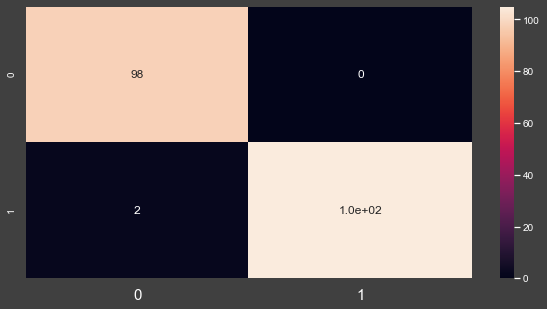

In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True);
#accuracy score
from sklearn.metrics import accuracy_score
ann_accuracy=accuracy_score(y_test, y_pred.round())


ann_precision = precision_score(y_test, y_pred.round())
ann_recall = recall_score(y_test,y_pred.round())
print('Artificial Neural Networks Accuracy: {:.2f}%'.format(ann_accuracy*100))
print('Artificial Neural Networks Recall: {:.2f}%'.format(ann_recall*100))
print('Artificial Neural Networks Precision: {:.2f}%'.format(ann_precision*100))